# Hallazgos

## Lectura archivo

- Encoding UTF-8 no sirve
- Duplicados
- Ciudades mal escritas (Andorra - aixirivali (aixirivall))
- Hay ciudades que están en varios estados a la vez (Ej: Edinburg)

## Caso
- Identificar qué ciudades son costa este y costa oeste
- 


In [251]:
import pandas as pd

file_path = 'C:/Users/rodri/Downloads/'
df = pd.read_csv( file_path + "worldcitiespop.txt", sep = ",", encoding='latin-1')
df

C:\Users\rodri\AppData\Local\Temp\ipykernel_4004\950364824.py:4: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



,Country,City,AccentCity,Region,Population,Latitude,Longitude
0,ad,aixas,Aixàs,6.0,NaN,42.483333,1.466667
1,ad,aixirivali,Aixirivali,6.0,NaN,42.466667,1.500000
2,ad,aixirivall,Aixirivall,6.0,NaN,42.466667,1.500000
3,ad,aixirvall,Aixirvall,6.0,NaN,42.466667,1.500000
4,ad,aixovall,Aixovall,6.0,NaN,42.466667,1.483333
...,...,...,...,...,...,...,...
3173953,zw,zimre park,Zimre Park,4,NaN,-17.866111,31.213611
3173954,zw,ziyakamanas,Ziyakamanas,0,NaN,-18.216667,27.950000
3173955,zw,zizalisari,Zizalisari,4,NaN,-17.758889,31.010556
3173956,zw,zuzumba,Zuzumba,6,NaN,-20.033333,27.933333


In [252]:
df.info(show_counts=True)
# City, AccentCity, Population, Region tienen valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173958 entries, 0 to 3173957
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Country     3173958 non-null  object 
 1   City        3173952 non-null  object 
 2   AccentCity  3173954 non-null  object 
 3   Region      3173950 non-null  object 
 4   Population  47980 non-null    float64
 5   Latitude    3173958 non-null  float64
 6   Longitude   3173958 non-null  float64
dtypes: float64(3), object(4)
memory usage: 169.5+ MB


In [253]:
#Eliminando posibles espacios en blanco en campos Country y City
df['Country']= df.Country.apply(str.strip)
df['City']= df.City.apply(lambda x: x if pd.isnull(x) else str.strip(x)) #Columna tiene valores nulos

In [254]:
#Hay ciudades en distintos estados
df[df.City == 'edinburg']

,Country,City,AccentCity,Region,Population,Latitude,Longitude
1726221,lv,edinburg,Edinburg,25,NaN,56.977500,23.826944
2938825,us,edinburg,Edinburg,IL,NaN,39.657222,-89.389444
2945237,us,edinburg,Edinburg,IA,NaN,42.133333,-91.133889
2973211,us,edinburg,Edinburg,MS,NaN,32.799167,-89.336111
2976096,us,edinburg,Edinburg,MO,NaN,40.081389,-93.693611
2983872,us,edinburg,Edinburg,NJ,NaN,40.258056,-74.616389
2988643,us,edinburg,Edinburg,NY,NaN,43.221667,-74.104444
2997648,us,edinburg,Edinburg,ND,NaN,48.496667,-97.861667
2999579,us,edinburg,Edinburg,OH,NaN,41.099722,-81.146111
3008561,us,edinburg,Edinburg,PA,NaN,41.014444,-80.436944


In [255]:
# Creando dataframe con ciudades de UK
# NOTA: Reino unido es Gran Bretaña (Escocia, Inglaterra, Gales) + Irlanda del norte
df_uk = df[df.Country.isin(['gb', 'ie'])]
print("Número de nombres distintos de ciudades en UK: " + str(len(df_uk.City.drop_duplicates())))
df_uk

Número de nombres distintos de ciudades en UK: 24089


,Country,City,AccentCity,Region,Population,Latitude,Longitude
986483,gb,abberley,Abberley,Q4,NaN,52.300000,-2.366667
986484,gb,abberton,Abberton,E4,NaN,51.833333,0.916667
986485,gb,abberton,Abberton,Q4,NaN,52.183333,-2.016667
986486,gb,abbess roding,Abbess Roding,E4,NaN,51.783333,0.266667
986487,gb,abbey-cwmhir,Abbey-Cwmhir,Y8,NaN,52.333333,-3.400000
...,...,...,...,...,...,...,...
1318046,ie,yellow furze,Yellow Furze,21.0,NaN,53.673333,-6.571667
1318047,ie,yellowpit cross roads,Yellowpit Cross Roads,15.0,NaN,53.046667,-7.156111
1318048,ie,youghal,Youghal,4.0,6868.0,51.950000,-7.850556
1318049,ie,youghal,Youghal,26.0,NaN,52.888611,-8.307500


In [256]:

df_us = df[(df.Country == 'us')]
print("Número de nombres distintos de ciudades en US: " + str(len(df_us.City.drop_duplicates())))
df_us

Número de nombres distintos de ciudades en US: 85964


,Country,City,AccentCity,Region,Population,Latitude,Longitude
2907718,us,abanda,Abanda,AL,NaN,33.100833,-85.529722
2907719,us,abbeville,Abbeville,AL,NaN,31.571667,-85.250556
2907720,us,abbot springs,Abbot Springs,AL,NaN,33.360833,-86.481667
2907721,us,abel,Abel,AL,NaN,33.548611,-85.712500
2907722,us,abercrombie,Abercrombie,AL,NaN,32.848611,-87.165000
...,...,...,...,...,...,...,...
3049702,us,wyoming,Wyoming,WY,NaN,41.477500,-105.636111
3049703,us,wyopo,Wyopo,WY,NaN,42.855556,-108.688611
3049704,us,y-o ranch,Y-O Ranch,WY,NaN,42.030833,-104.939444
3049705,us,yanceys,Yanceys,WY,NaN,44.930833,-110.435556


In [257]:
#Extraer listas de ciudades de costa este y oeste
import requests
r = requests.get('https://www.geographyrealm.com/how-many-states-are-along-the-east-and-west-coasts/')
df_list = pd.read_html(r.text, header=0)
east_coast_states= df_list[0]
west_coast_states= df_list[1]

In [258]:
#Agregar código de estado a los estados
us_state_to_code = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
east_coast_states['state_code'] = east_coast_states.State.map(us_state_to_code)
west_coast_states['state_code'] = west_coast_states.State.map(us_state_to_code)

In [259]:
west_coast_states

,State,CRS,CRS Rank,NOAA,NOAA Rank,state_code
0,Alaska,"6,640 mi (10,690 km)",1,"33,904 mi (54,563 km)",1,AK
1,California,"840 mi (1,350 km)",3,"3,427 mi (5,515 km)",5,CA
2,Hawaii,"750 mi (1,210 km)",4,"1,052 mi (1,693 km)",18,HI
3,Oregon,296 mi (476 km),8,"1,410 mi (2,270 km)",17,OR
4,Washington,157 mi (253 km),12,"3,026 mi (4,870 km)",11,WA


In [260]:
east_coast_states

,State,CRS,CRS Rank,NOAA,NOAA Rank,state_code
0,Florida,"1,350 mi (2,170 km)",2,"8,436 mi (13,576 km)",2,FL
1,North Carolina,301 mi (484 km),7,"3,375 mi (5,432 km)",6,NC
2,Maine,228 mi (367 km),9,"3,478 mi (5,597 km)",4,ME
3,Massachusetts,192 mi (309 km),10,"1,519 mi (2,445 km)",16,MA
4,South Carolina,187 mi (301 km),11,"2,876 mi (4,628 km)",12,SC
5,New Jersey,130 mi (210 km),13,"1,792 mi (2,884 km)",15,NJ
6,New York,127 mi (204 km),14,"2,625 mi (4,225 km)",13,NY
7,Virginia,112 mi (180 km),15,"3,315 mi (5,335 km)",8,VA
8,Georgia,100 mi (160 km),16,"2,344 mi (3,772 km)",14,GA
9,Connecticut,96 mi (154 km),17,618 mi (995 km),21,CT


In [261]:
#Etiquetar estados en dataframe principal

df_us['isEast'] = df_us['Region'].isin(east_coast_states.state_code)
df_us['isWest'] = df_us['Region'].isin(west_coast_states.state_code)
df_us

C:\Users\rodri\AppData\Local\Temp\ipykernel_4004\3639797938.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\rodri\AppData\Local\Temp\ipykernel_4004\3639797938.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country,City,AccentCity,Region,Population,Latitude,Longitude,isEast,isWest
2907718,us,abanda,Abanda,AL,NaN,33.100833,-85.529722,False,False
2907719,us,abbeville,Abbeville,AL,NaN,31.571667,-85.250556,False,False
2907720,us,abbot springs,Abbot Springs,AL,NaN,33.360833,-86.481667,False,False
2907721,us,abel,Abel,AL,NaN,33.548611,-85.712500,False,False
2907722,us,abercrombie,Abercrombie,AL,NaN,32.848611,-87.165000,False,False
...,...,...,...,...,...,...,...,...,...
3049702,us,wyoming,Wyoming,WY,NaN,41.477500,-105.636111,False,False
3049703,us,wyopo,Wyopo,WY,NaN,42.855556,-108.688611,False,False
3049704,us,y-o ranch,Y-O Ranch,WY,NaN,42.030833,-104.939444,False,False
3049705,us,yanceys,Yanceys,WY,NaN,44.930833,-110.435556,False,False


In [262]:
#Checkeo que todos los estados estén listados
print("Total estados west coast: " + str(len(df_us[df_us.isWest]['Region'].drop_duplicates()))) #5 estados, check
print("Total estados east coast: " + str(len(df_us[df_us.isEast]['Region'].drop_duplicates()))) #14 estados, check

Total estados west coast: 5
Total estados east coast: 14


In [263]:
#
df_us['hasUKcityname'] = df_us.City.isin(df_uk.City.drop_duplicates())
df_us

C:\Users\rodri\AppData\Local\Temp\ipykernel_4004\4045605639.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country,City,AccentCity,Region,Population,Latitude,Longitude,isEast,isWest,hasUKcityname
2907718,us,abanda,Abanda,AL,NaN,33.100833,-85.529722,False,False,False
2907719,us,abbeville,Abbeville,AL,NaN,31.571667,-85.250556,False,False,True
2907720,us,abbot springs,Abbot Springs,AL,NaN,33.360833,-86.481667,False,False,False
2907721,us,abel,Abel,AL,NaN,33.548611,-85.712500,False,False,False
2907722,us,abercrombie,Abercrombie,AL,NaN,32.848611,-87.165000,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3049702,us,wyoming,Wyoming,WY,NaN,41.477500,-105.636111,False,False,False
3049703,us,wyopo,Wyopo,WY,NaN,42.855556,-108.688611,False,False,False
3049704,us,y-o ranch,Y-O Ranch,WY,NaN,42.030833,-104.939444,False,False,False
3049705,us,yanceys,Yanceys,WY,NaN,44.930833,-110.435556,False,False,False


In [264]:
df_us.rename({'Region': 'State'}, axis=1, inplace = True)
df_us['Region'] = df_us.apply(lambda x: 'East Coast' if x['isEast'] else ('West Coast' if x['isWest'] else None), axis = 1)

C:\Users\rodri\AppData\Local\Temp\ipykernel_4004\4243574241.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\rodri\AppData\Local\Temp\ipykernel_4004\4243574241.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [265]:
df_us

,Country,City,AccentCity,State,Population,Latitude,Longitude,isEast,isWest,hasUKcityname,Region
2907718,us,abanda,Abanda,AL,NaN,33.100833,-85.529722,False,False,False,None
2907719,us,abbeville,Abbeville,AL,NaN,31.571667,-85.250556,False,False,True,None
2907720,us,abbot springs,Abbot Springs,AL,NaN,33.360833,-86.481667,False,False,False,None
2907721,us,abel,Abel,AL,NaN,33.548611,-85.712500,False,False,False,None
2907722,us,abercrombie,Abercrombie,AL,NaN,32.848611,-87.165000,False,False,False,None
...,...,...,...,...,...,...,...,...,...,...,...
3049702,us,wyoming,Wyoming,WY,NaN,41.477500,-105.636111,False,False,False,None
3049703,us,wyopo,Wyopo,WY,NaN,42.855556,-108.688611,False,False,False,None
3049704,us,y-o ranch,Y-O Ranch,WY,NaN,42.030833,-104.939444,False,False,False,None
3049705,us,yanceys,Yanceys,WY,NaN,44.930833,-110.435556,False,False,False,None


In [266]:
#Filtrar datos para análisis final
df_us_west_east = df_us[df_us.isEast | df_us.isWest][['City', 'State', 'Region', 'hasUKcityname']].drop_duplicates()
df_us_west_east

,City,State,Region,hasUKcityname
2911976,adak,AK,West Coast,False
2911977,afognak,AK,West Coast,False
2911978,aguikchuk,AK,West Coast,False
2911979,akhiok,AK,West Coast,False
2911980,akiachak,AK,West Coast,False
...,...,...,...,...
3043304,york,WA,West Coast,True
3043305,zangar junction,WA,West Coast,False
3043306,zenith,WA,West Coast,False
3043307,zillah,WA,West Coast,False


In [285]:
# Desglose por región
region_summary = df_us_west_east.groupby(['Region']).agg(
                                    {'City': 'nunique', 
                                    'hasUKcityname': 'sum'}).reset_index().rename({
                                                                                    'City': 'Total_Cities',
                                                                                    'hasUKcityname': 'Total_Cities_with_UK_city_name'
                                    }, axis=1)
region_summary['total_perc'] = region_summary.apply(lambda x: round(100*x['Total_Cities_with_UK_city_name']/x['Total_Cities'], 2), axis = 1)
region_summary

,Region,Total_Cities,Total_Cities_with_UK_city_name,total_perc
0,East Coast,36721,3208,8.74
1,West Coast,9440,675,7.15


In [286]:
# Desglose por estado
state_summary = df_us_west_east.groupby(['Region','State']).agg(
                                                {'City': 'nunique', 
                                                'hasUKcityname': 'sum'}).reset_index().rename({
                                                                                    'City': 'Total_Cities',
                                                                                    'hasUKcityname': 'Total_Cities_with_UK_city_name'
                                    }, axis=1)
state_summary['total_perc'] = state_summary.apply(lambda x: round(100*x['Total_Cities_with_UK_city_name']/x['Total_Cities'], 2), axis = 1)
state_summary


,Region,State,Total_Cities,Total_Cities_with_UK_city_name,total_perc
0,East Coast,CT,977,108,11.05
1,East Coast,DE,1546,91,5.89
2,East Coast,FL,3158,175,5.54
3,East Coast,GA,5438,344,6.33
4,East Coast,MA,2176,238,10.94
5,East Coast,MD,7263,375,5.16
6,East Coast,ME,2032,149,7.33
7,East Coast,NC,4488,307,6.84
8,East Coast,NH,965,140,14.51
9,East Coast,NJ,2387,194,8.13


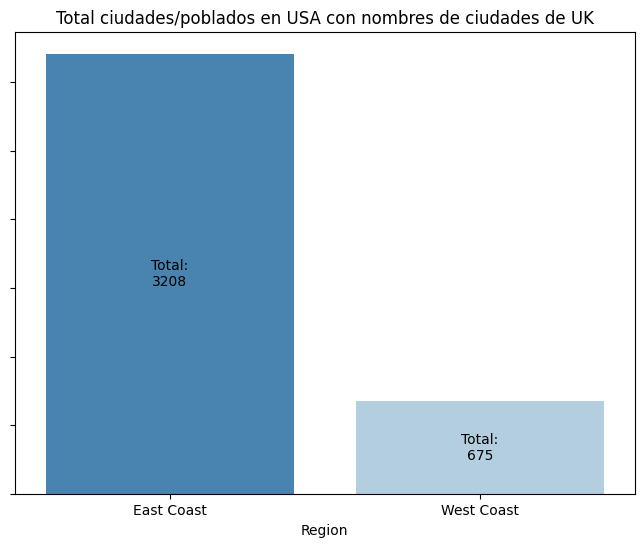

In [279]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 6))
#sns.barplot(x='set', y='val', data=df)
sns.barplot(data=region_summary, 
                        x="Region", 
                        y="Total_Cities_with_UK_city_name", 
                        palette = 'Blues_r',
                        capsize=0.2, ax=ax).set(xlabel='Region', 
                                                 ylabel='', 
                                                 title='Total ciudades/poblados en USA con nombres de ciudades de UK',
                                                 yticklabels = [])

for p in ax.patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    xy = (x + w / 2., h / 2)
    text = f'Total:\n{h:0.0f}'
    ax.annotate(text=text, xy=xy, ha='center', va='center')

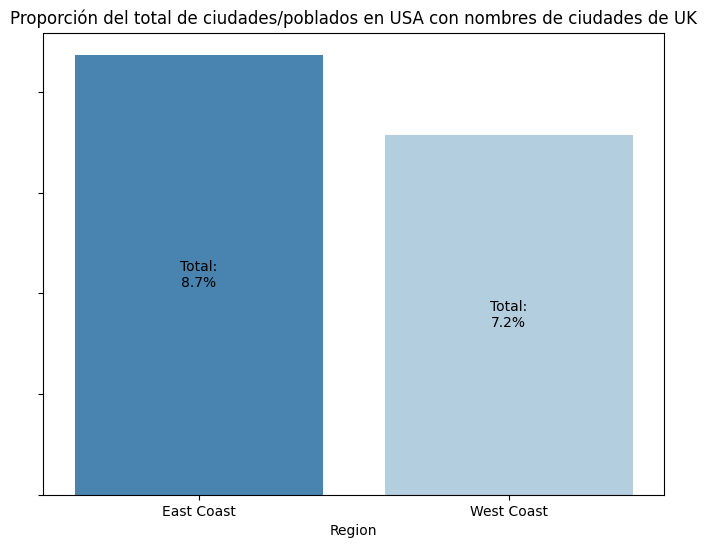

In [291]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 6))
#sns.barplot(x='set', y='val', data=df)
sns.barplot(data=region_summary, 
                        x="Region", 
                        y="total_perc", 
                        palette = 'Blues_r',
                        capsize=0.2, ax=ax).set(xlabel='Region', 
                                                 ylabel='', 
                                                 title='Proporción del total de ciudades/poblados en USA con nombres de ciudades de UK',
                                                 yticklabels = [])

for p in ax.patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    xy = (x + w / 2., h / 2)
    text = f'Total:\n{h:.1f}%'
    ax.annotate(text=text, xy=xy, ha='center', va='center')#{:.1f}%

In [270]:
import plotly.express as px
fig = px.choropleth(state_summary,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Total_Cities_with_UK_city_name',
                    color_continuous_scale=px.colors.diverging.RdGy_r,
                    )
fig.update_layout(
      title_text = 'Total ciudades/poblados en USA con nombres de ciudades de UK por Estado',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45,
      coloraxis_colorbar=dict(
            title="Total ciudades/poblados",yanchor="top",y=1,
    ticks="outside",),
)
fig.show()